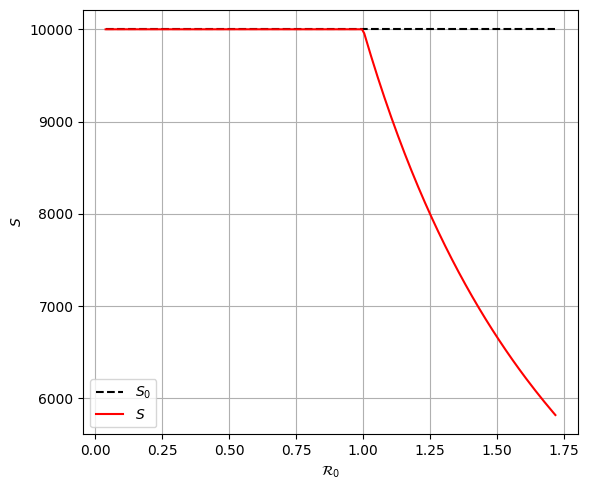

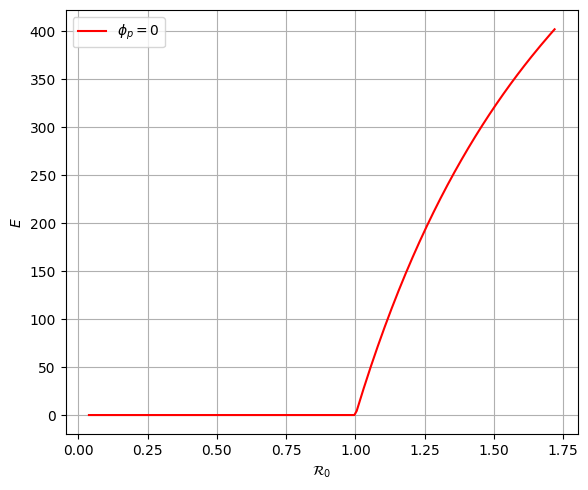

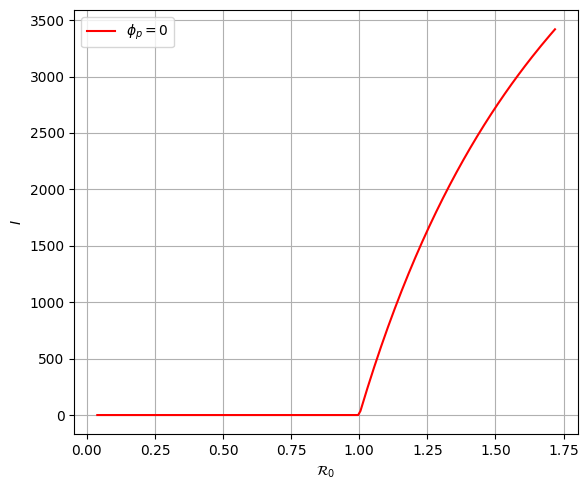

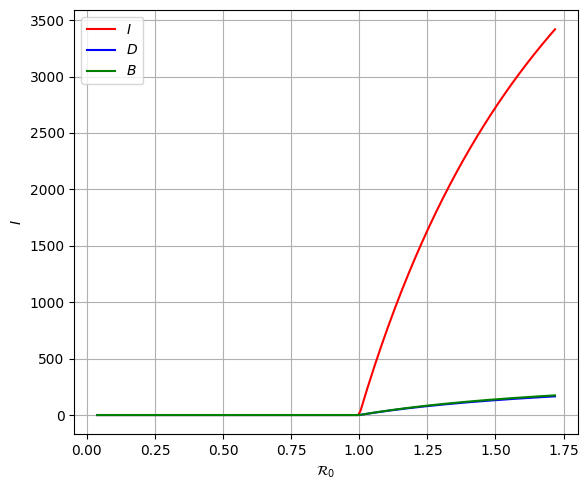

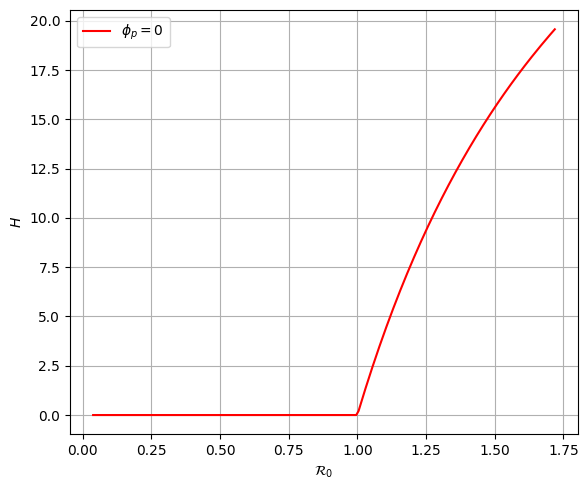

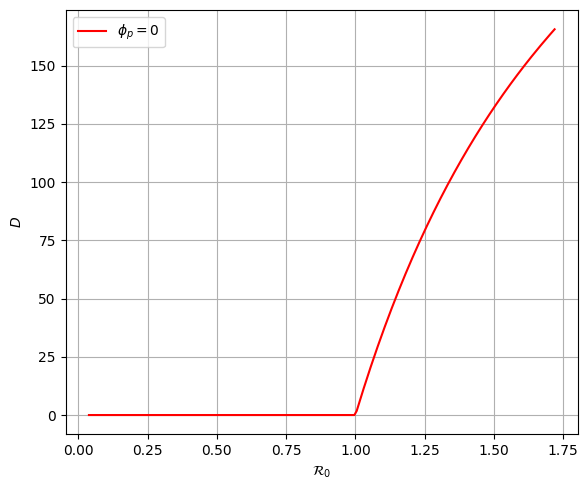

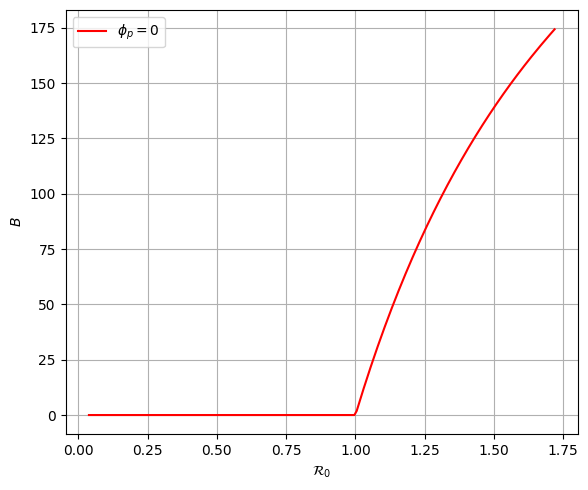

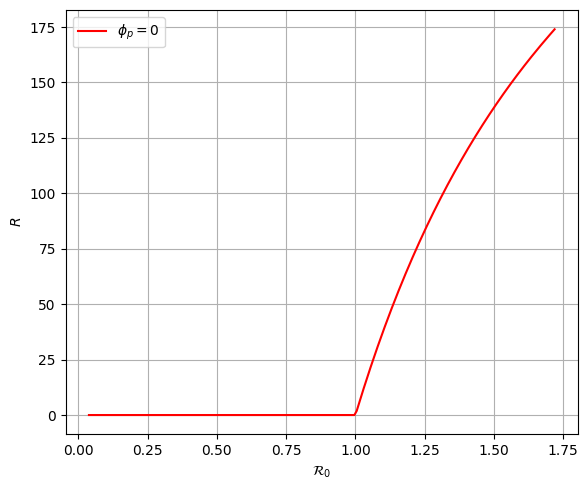

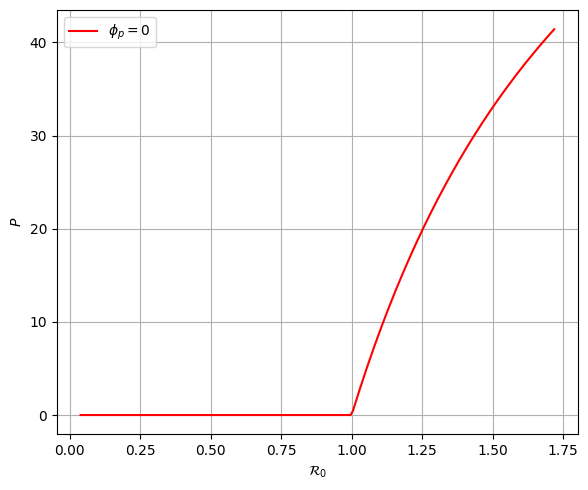

In [ ]:
# plot the bifurcation solutions for phi_p = 0
# Georg Bader/Ijuptil Joseph 7/11/2024
# The code generates a subfolder and puts the
# plotrs into the subfolder Bifur

import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt

#generate a subfolder for the plots
import os
os.makedirs('Bifur')

# Time span
Tend = 120.

# Population
N = 10000

beta    = 0.000000190       # beta
beta_1  = 0.0000000245      # beta_1
beta_2  = 0.000000065      # beta_2
beta_3  = 0.0000000650   # beta_3
beta_p  = 0.000620       # beta_p

delta   = 0.93          # delta
gamma   = 0.00055         # gamma
gamma_1 = 0.00990          # gamma_1  (very sensitive)
sigma   = 0.006         # sigma
d_1     = 0.000010       # d_1
eta     = 0.750        # eta
xi      = 0.88000       # xi
d       = 0.1000       # d
eta_1   = 0.010      # eta_1
alpha   = 0.50000       # alpha

phi_p   = 0.0

b_1     = 0.65*d_1  # b_1 = 0.65*d_1
b       = 0.95*d    # b = 0.95*d

factor = 0.20
beta   *= factor
beta_1 *= factor
beta_2 *= factor
beta_3 *= factor
beta_p *= factor

#mu      = 1./(52*60.1)
#Delta   = N*mu
mu = 0.099
Delta = N * mu

def ebola(z,t):
    S, E, I, H, R, D, B, P = z

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P

    dS = Delta - (Psi + mu)*S
    dE = Psi*S - a1*E
    dI = delta*E - a2*I
    dH = gamma_1*I - a3*H
    dR = xi*H -  mu*R
    dD = gamma*I + eta*H - d*D
    dB = d*D - b*B
    dP = phi_p + sigma*I + eta_1*H + d_1*D + b_1*B - alpha*P

    return np.array([dS, dE, dI, dH, dR, dD, dB, dP])

def RR():

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = (beta + beta_2*gamma/d + beta_3*gamma/b + beta_p*sigma/alpha + beta_p*gamma/alpha*(d_1/d+b_1/b))*Delta*delta/(mu*a1*a2) + \
         (beta_1 + beta_2*eta/d + beta_3*eta/b + beta_p*eta_1/alpha + beta_p*eta/alpha*(d_1/d+b_1/b))*Delta*delta*gamma_1/(mu*a1*a2*a3)
    return R0

def Equilib():

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu


    R0 = RR()
    if phi_p > 0.0:
        A = -a1**2*R0/Delta
        B = a1*(R0 - 1. - beta_p*phi_p/(mu*alpha))
        C = Delta*beta_p*phi_p/(mu*alpha)
        #E11 = (-B - np.sqrt(B**2 - 4*A*C))/(2.*A)
        #E12 = (-B + np.sqrt(B**2 - 4*A*C))/(2.*A)
        #print(E11,E12)
        E1 = (-B - np.sqrt(B**2 - 4*A*C))/(2.*A)
        S1 = (Delta - a1*E1)/mu
    else:
        S1 = Delta/(mu*R0)
        E1 = Delta*(R0 - 1.)/(a1*R0)

    I1 = E1 * delta/a2
    H1 = I1 * gamma_1/a3
    R1 = H1 * xi/mu
    D1 = (gamma + eta*gamma_1/a3)*delta/(a2*d)*E1
    B1 = (gamma + eta*gamma_1/a3)*delta/(a2*b)*E1
    P1 = ((sigma + eta_1*gamma_1/a3 + (d_1/d+b_1/b)*(gamma + eta*gamma_1/a3))*delta/a2*E1 + phi_p)/alpha
    S1 = min(S1,Delta/mu)
    E1 = max(E1,0)
    I1 = max(I1,0)
    H1 = max(H1,0)
    R1 = max(R1,0)
    D1 = max(D1,0)
    B1 = max(B1,0)
    P1 = max(P1,0)
    return np.array([S1,E1,I1,H1,R1,D1,B1,P1])

Beta   = beta
Beta_1 = beta_1
Beta_2 = beta_2
Beta_3 = beta_3
Beta_p = beta_p
nr = 201
fr = np.linspace(0.3, 13.5, nr)
RE  = np.zeros(nr)
S   = np.zeros(nr)
E   = np.zeros(nr)
I   = np.zeros(nr)
H   = np.zeros(nr)
R   = np.zeros(nr)
D   = np.zeros(nr)
B   = np.zeros(nr)
P   = np.zeros(nr)

for ir in range(nr):
    factor = fr[ir]
    beta   = factor * Beta
    beta_1 = factor * Beta_1
    beta_2 = factor * Beta_2
    beta_3 = factor * Beta_3
    beta_p = factor * Beta_p
    RE[ir] = RR()
   # print('R0 =',R0)
    #print('')
    z = Equilib()
    S[ir] = z[0]
    E[ir] = z[1]
    I[ir] = z[2]
    H[ir] = z[3]
    R[ir] = z[4]
    D[ir] = z[5]
    B[ir] = z[6]
    P[ir] = z[7]

phi_p  = 0.0
S0  = np.zeros(nr)
E0  = np.zeros(nr)
I0  = np.zeros(nr)
H0  = np.zeros(nr)
R0  = np.zeros(nr)
D0  = np.zeros(nr)
B0  = np.zeros(nr)
P0  = np.zeros(nr)

for ir in range(nr):
    factor = fr[ir]
    beta   = factor * Beta
    beta_1 = factor * Beta_1
    beta_2 = factor * Beta_2
    beta_3 = factor * Beta_3
    beta_p = factor * Beta_p
    RE[ir] = RR()
    #print('R0 =',R0)
    #print('')
    z = Equilib()
    S0[ir] = z[0]
    E0[ir] = z[1]
    I0[ir] = z[2]
    H0[ir] = z[3]
    R0[ir] = z[4]
    D0[ir] = z[5]
    B0[ir] = z[6]
    P0[ir] = z[7]

#for i in range(nr):
#    print(' %14.9e %14.9e' % (RE[i],S[i]))

# Plot of Susceptible class
plt.figure(figsize=(6, 5))
plt.plot([RE[0],RE[-1]], [N, N], 'k--', label='$S_0$')
plt.plot(RE, S, 'r-', label='$S$')
#plt.plot(RE, S0, 'm--', label='$S_0$')
#plt.plot([RE[0],RE[-1]], [N, N], 'k--', label='$S_0$')
plt.grid(True)
plt.legend()
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$S$')
#plt.title('Compartment S')
plt.tight_layout()
plt.savefig('Bifur/S.pdf',bbox_inches='tight')


# Plot for Exposed class
plt.figure(figsize=(6, 5))
plt.plot(RE, E, 'r-', label='$\phi_p = 0$')
#plt.plot(RE, E0, 'm--', label='$E_0$')
plt.grid(True)
plt.legend()
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$E$')
#plt.title('Compartment E')
plt.tight_layout()
plt.savefig('Bifur/E.pdf',bbox_inches='tight')


# Plot of Infectious class I
plt.figure(figsize=(6, 5))
plt.plot(RE, I, 'r-', label='$\phi_p = 0$')
#plt.plot(RE, I0, 'r--', label='$I_0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$I$')
#plt.title('Compartment I, D, B')
plt.tight_layout()
plt.savefig('Bifur/I.pdf',bbox_inches='tight')
plt.show()


# Plot of I, D and B
plt.figure(figsize=(6, 5))
plt.plot(RE, I, 'r-', label='$I$')
#plt.plot(RE, I0, 'r--', label='$I_0$')
plt.plot(RE, D, 'b-', label='$D$')
#plt.plot(RE, D0, 'b--', label='$D_0$')
plt.plot(RE, B, 'g-', label='$B$')
#plt.plot(RE, B0, 'g--', label='$B_0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$I$')
#plt.title('Compartment I, D, B')
plt.tight_layout()
plt.savefig('Bifur/IDB.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(RE, H, 'r-', label='$\phi_p = 0$')
#plt.plot(RE, H0, 'm--', label='$H_0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$H$')
#plt.title('Compartment H')
plt.tight_layout()
plt.savefig('Bifur/H.pdf',bbox_inches='tight')


# Deceased class plot
plt.figure(figsize=(6, 5))
plt.plot(RE, D, 'r-', label='$\phi_p = 0$')
#plt.plot(RE, H0, 'm--', label='$H_0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$D$')
#plt.title('Compartment H')
plt.tight_layout()
plt.savefig('Bifur/D.pdf',bbox_inches='tight')


# Buried class plot
plt.figure(figsize=(6, 5))
plt.plot(RE, B, 'r-', label='$\phi_p = 0$')
#plt.plot(RE, H0, 'm--', label='$H_0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$B$')
#plt.title('Compartment H')
plt.tight_layout()
plt.savefig('Bifur/B.pdf',bbox_inches='tight')


# Recovered class plot
plt.figure(figsize=(6, 5))
plt.plot(RE, R, 'r-', label='$\phi_p = 0$')
#plt.plot(RE, R0, 'm--', label='$R_0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$R$')
#plt.title('Compartment R')
plt.tight_layout()
plt.savefig('Bifur/R.pdf',bbox_inches='tight')

# Pathogen class plot
plt.figure(figsize=(6, 5))
plt.plot(RE, P, 'r-', label='$\phi_p = 0$')
#plt.plot(RE, P0, 'm--', label='$P_0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$P$')
#plt.title('Compartment P')
plt.tight_layout()
plt.savefig('Bifur/P.pdf',bbox_inches='tight')


plt.show()

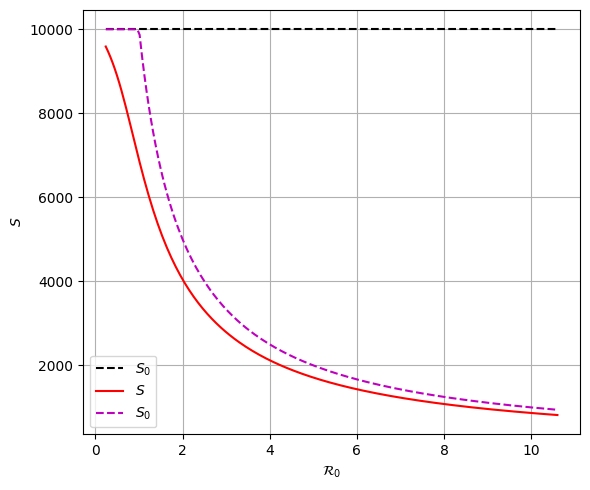

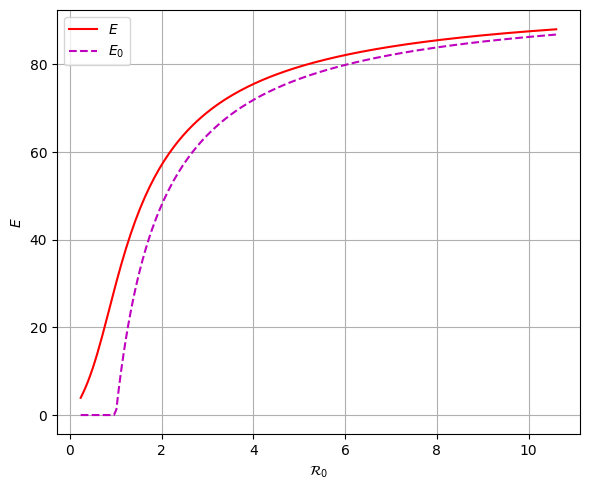

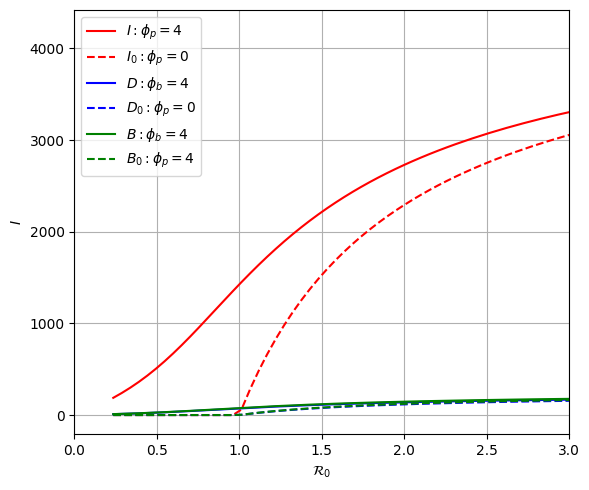

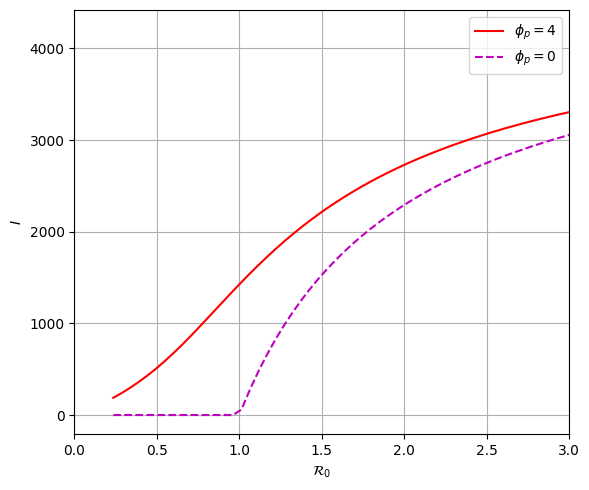

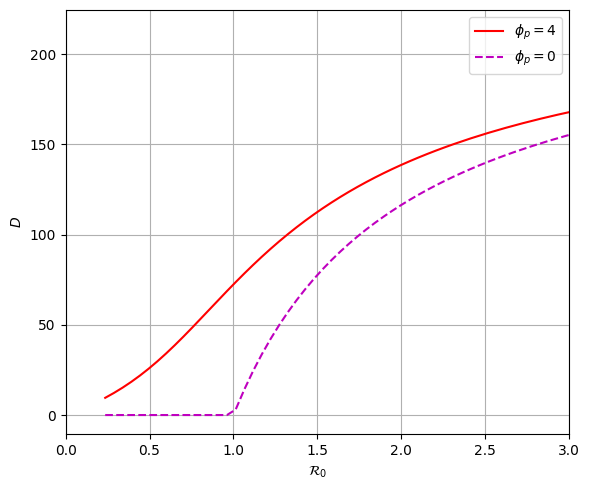

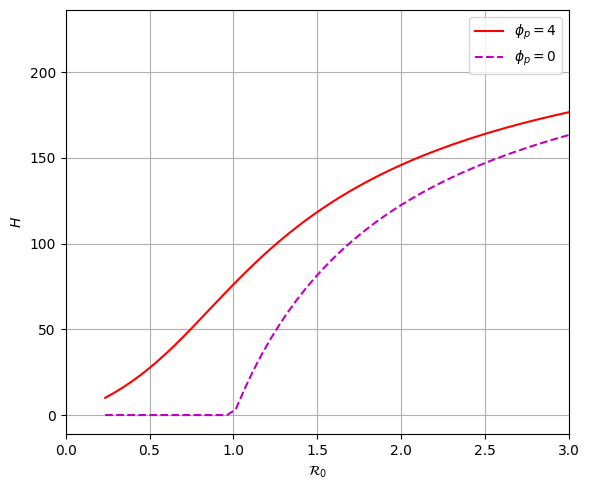

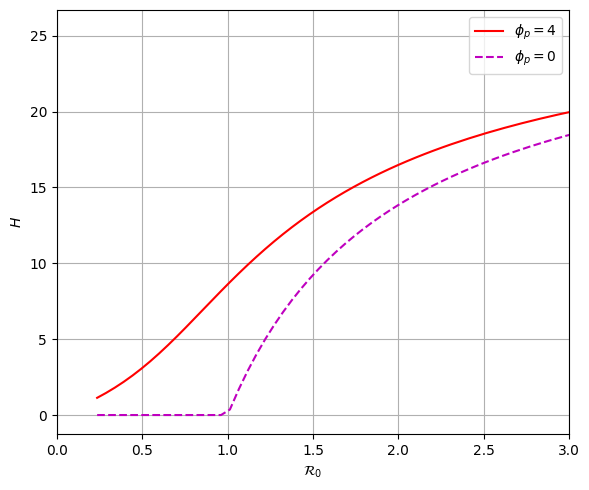

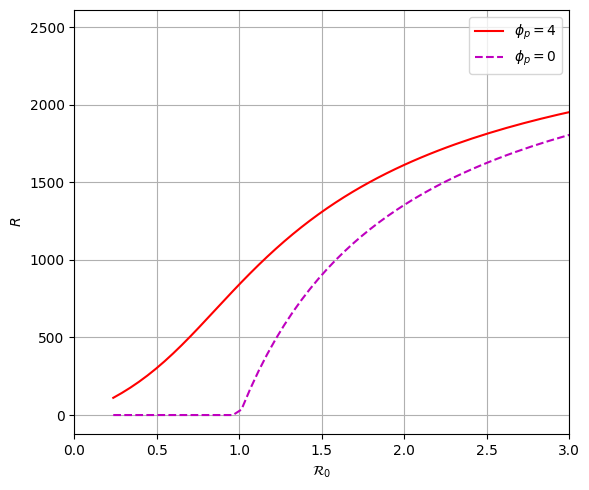

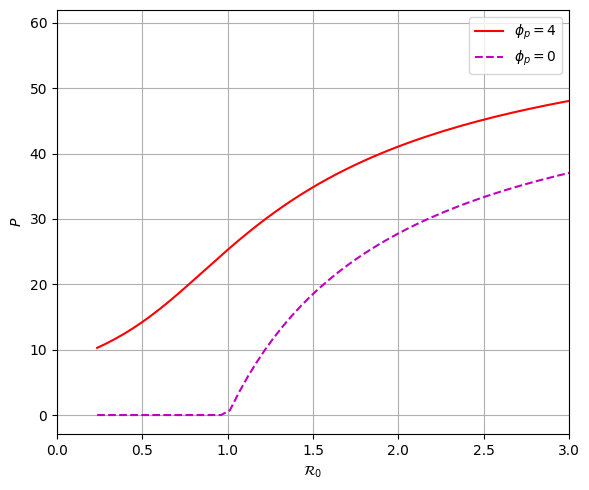

In [4]:
## COMPARISION

#
# The graphs generated in with this code compare the
# state variables phi_p = 4 (solid lines) with the
# case phi_p = 0 (dashed line).
# Georg Bader 7/11/2024
#

import os
import numpy as np
from scipy.integrate import odeint
from scipy.linalg import eig
import matplotlib.pyplot as plt

#generate a subfolder for the plots
import os
os.makedirs('Compare')

# Time span
Tend = 120.

# Population
N = 10000

beta    = 0.000000190       # beta
beta_1  = 0.0000000245      # beta_1
beta_2  = 0.000000065      # beta_2
beta_3  = 0.0000000650   # beta_3
beta_p  = 0.000620       # beta_p

delta   = 0.93          # delta
gamma   = 0.00055         # gamma
gamma_1 = 0.00990          # gamma_1  (very sensitive)
sigma   = 0.006         # sigma
d_1     = 0.000010       # d_1
eta     = 0.750        # eta
xi      = 0.88000       # xi
d       = 0.1000       # d
eta_1   = 0.010      # eta_1
alpha   = 0.50000       # alpha


phi_p   = 4

b_1     = 0.65*d_1  # b_1 = 0.65*d_1
b       = 0.95*d    # b = 0.95*d

mu      = 0.009
Delta   = N*mu

factor = 0.20
beta   *= factor
beta_1 *= factor
beta_2 *= factor
beta_3 *= factor
beta_p *= factor

def ebola(z,t):
    S, E, I, H, R, D, B, P = z

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    Psi = beta*I + beta_1*H + beta_2*D + beta_3*B + beta_p*P

    dS = Delta - (Psi + mu)*S
    dE = Psi*S - a1*E
    dI = delta*E - a2*I
    dH = gamma_1*I - a3*H
    dR = xi*H -  mu*R
    dD = gamma*I + eta*H - d*D
    dB = d*D - b*B
    dP = phi_p + sigma*I + eta_1*H + d_1*D + b_1*B - alpha*P

    return np.array([dS, dE, dI, dH, dR, dD, dB, dP])

def RR():

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = (beta + beta_2*gamma/d + beta_3*gamma/b + beta_p*sigma/alpha + beta_p*gamma/alpha*(d_1/d+b_1/b))*Delta*delta/(mu*a1*a2) + \
         (beta_1 + beta_2*eta/d + beta_3*eta/b + beta_p*eta_1/alpha + beta_p*eta/alpha*(d_1/d+b_1/b))*Delta*delta*gamma_1/(mu*a1*a2*a3)
    return R0

def Equilib():

    a1 = delta + mu
    a2 = gamma + gamma_1 + mu
    a3 = eta + xi + mu

    R0 = RR()
    if phi_p > 0.0:
        A = -a1**2*R0/Delta
        B = a1*(R0 - 1. - beta_p*phi_p/(mu*alpha))
        C = Delta*beta_p*phi_p/(mu*alpha)
        #E11 = (-B - np.sqrt(B**2 - 4*A*C))/(2.*A)
        #E12 = (-B + np.sqrt(B**2 - 4*A*C))/(2.*A)
        #print(E11,E12)
        E1 = (-B - np.sqrt(B**2 - 4*A*C))/(2.*A)
        S1 = (Delta - a1*E1)/mu
    else:
        S1 = Delta/(mu*R0)
        E1 = Delta*(R0 - 1.)/(a1*R0)

    I1 = E1 * delta/a2
    H1 = I1 * gamma_1/a3
    R1 = H1 * xi/mu
    D1 = (gamma + eta*gamma_1/a3)*delta/(a2*d)*E1
    B1 = (gamma + eta*gamma_1/a3)*delta/(a2*b)*E1
    P1 = ((sigma + eta_1*gamma_1/a3 + (d_1/d+b_1/b)*(gamma + eta*gamma_1/a3))*delta/a2*E1 + phi_p)/alpha
    S1 = min(S1,Delta/mu)
    E1 = max(E1,0)
    I1 = max(I1,0)
    H1 = max(H1,0)
    R1 = max(R1,0)
    D1 = max(D1,0)
    B1 = max(B1,0)
    P1 = max(P1,0)
    return np.array([S1,E1,I1,H1,R1,D1,B1,P1])

Beta   = beta
Beta_1 = beta_1
Beta_2 = beta_2
Beta_3 = beta_3
Beta_p = beta_p
nr = 201
fr = np.linspace(0.3, 13.5, nr)
RE  = np.zeros(nr)
S   = np.zeros(nr)
E   = np.zeros(nr)
I   = np.zeros(nr)
H   = np.zeros(nr)
R   = np.zeros(nr)
D   = np.zeros(nr)
B   = np.zeros(nr)
P   = np.zeros(nr)

for ir in range(nr):
    factor = fr[ir]
    beta   = factor * Beta
    beta_1 = factor * Beta_1
    beta_2 = factor * Beta_2
    beta_3 = factor * Beta_3
    beta_p = factor * Beta_p
    RE[ir] = RR()
    #print('R0 =',R0)
    #print('')
    z = Equilib()
    S[ir] = z[0]
    E[ir] = z[1]
    I[ir] = z[2]
    H[ir] = z[3]
    R[ir] = z[4]
    D[ir] = z[5]
    B[ir] = z[6]
    P[ir] = z[7]

phi_p  = 0.0
S0  = np.zeros(nr)
E0  = np.zeros(nr)
I0  = np.zeros(nr)
H0  = np.zeros(nr)
R0  = np.zeros(nr)
D0  = np.zeros(nr)
B0  = np.zeros(nr)
P0  = np.zeros(nr)

for ir in range(nr):
    factor = fr[ir]
    beta   = factor * Beta
    beta_1 = factor * Beta_1
    beta_2 = factor * Beta_2
    beta_3 = factor * Beta_3
    beta_p = factor * Beta_p
    #RE[ir] = RR()
    #print('R0 =',R0)
    #print('')
    z = Equilib()
    S0[ir] = z[0]
    E0[ir] = z[1]
    I0[ir] = z[2]
    H0[ir] = z[3]
    R0[ir] = z[4]
    D0[ir] = z[5]
    B0[ir] = z[6]
    P0[ir] = z[7]

#for i in range(nr):
#    print(' %14.9e %14.9e' % (RE[i],S[i]))

plt.figure(figsize=(6, 5))
plt.plot([RE[0],RE[-1]], [N, N], 'k--', label='$S_0$')
plt.plot(RE, S, 'r-', label='$S$')
plt.plot(RE, S0, 'm--', label='$S_0$')
#plt.plot([RE[0],RE[-1]], [N, N], 'k--', label='$S_0$')
plt.grid(True)
plt.legend()
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$S$')
#plt.title('Compartment S')
plt.tight_layout()
plt.savefig('Compare/SS0.pdf',bbox_inches='tight')

plt.figure(figsize=(6, 5))
plt.plot(RE, E, 'r-', label='$E$')
plt.plot(RE, E0, 'm--', label='$E_0$')
plt.grid(True)
plt.legend()
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$E$')
#plt.title('Compartment E')
plt.tight_layout()
plt.savefig('Compare/EE0.pdf',bbox_inches='tight')

plt.figure(figsize=(6, 5))
plt.plot(RE, I, 'r-', label='$I: \phi_p = 4$')
plt.plot(RE, I0, 'r--', label='$I_{0}: \phi_p = 0 $')
plt.plot(RE, D, 'b-', label='$D: \phi_b = 4$')
plt.plot(RE, D0, 'b--', label='$D_{0}: \phi_p = 0$')
plt.plot(RE, B, 'g-', label='$B: \phi_b = 4$')
plt.plot(RE, B0, 'g--', label='$B_{0}: \phi_p = 4$')
plt.grid(True)
plt.legend()
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$I$')
plt.xlim([0,3])
#plt.title('Compartment I, D, B')
plt.tight_layout()
plt.savefig('Compare/IDB.pdf',bbox_inches='tight')

plt.figure(figsize=(6, 5))
plt.plot(RE, I, 'r-',   label= '$\phi_p =4$')
plt.plot(RE, I0, 'm--', label= '$\phi_p =0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$I$')
plt.xlim([0,3])
#plt.title('Compartment I')
plt.tight_layout()
plt.savefig('Compare/II0.pdf',bbox_inches='tight')

plt.figure(figsize=(6, 5))
plt.plot(RE, D, 'r-',   label= '$\phi_p =4$')
plt.plot(RE, D0, 'm--', label= '$\phi_p =0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$D$')
plt.xlim([0,3])
#plt.title('Compartment H')
plt.tight_layout()
plt.savefig('Compare/DD0.pdf',bbox_inches='tight')

plt.figure(figsize=(6, 5))
plt.plot(RE, B, 'r-',   label= '$\phi_p =4$')
plt.plot(RE, B0, 'm--', label= '$\phi_p =0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$H$')
plt.xlim([0,3])
#plt.title('Compartment H')
plt.tight_layout()
plt.savefig('Compare/BB0.pdf',bbox_inches='tight')

plt.figure(figsize=(6, 5))
plt.plot(RE, H, 'r-',   label= '$\phi_p =4$')
plt.plot(RE, H0, 'm--', label= '$\phi_p =0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$H$')
plt.xlim([0,3])
#plt.title('Compartment H')
plt.tight_layout()
plt.savefig('Compare/HH0.pdf',bbox_inches='tight')

plt.figure(figsize=(6, 5))
plt.plot(RE, R, 'r-',   label= '$\phi_p =4$')
plt.plot(RE, R0, 'm--', label= '$\phi_p =0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$R$')
plt.xlim([0,3])
#plt.title('Compartment R')
plt.tight_layout()
plt.savefig('Compare/RR0.pdf',bbox_inches='tight')

plt.figure(figsize=(6, 5))
plt.plot(RE, P, 'r-',   label= '$\phi_p =4$')
plt.plot(RE, P0, 'm--', label= '$\phi_p =0$')
plt.grid(True)
plt.legend()
#plt.ylim([0,15000])
plt.xlabel('$\mathcal{R}_0$')
plt.ylabel('$P$')
#plt.title('Compartment P')
plt.xlim([0,3])
plt.tight_layout()
plt.savefig('Compare/PP0.pdf',bbox_inches='tight')

plt.show()


In [ ]:
mu = 1./(52*60.1)

In [ ]:
mu

0.00031997952131063606